In [1]:
#first compare the 1cm to other scintillators for those contants
#find constants of other scints to themselves at diff voltages
#relate diff voltages of diff thicknesses back to 1cm

In [2]:
from ROOT import TFile, TCanvas, TH1D, TF1
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.22/08


In [3]:
##===WE SHOULD CHECK THE CUTOFFS (200, 3800) FOR THE GRAPH FITTING===##

#make it a function so we can run it on any scintillator/voltage
def fittiGraph(runNums: list):
    """Fits the scintillator data for each run from a list of run numbers
    to a landau distribution, and returns a 2d ndarray, with a row per run;
    first column is the MPV (landau peak) and the second is the mean QDC count"""
    
    #variables
    scintMeans = []
    holdScint = []
    fitti = TF1('fitti', 'landau')
    
    #base case, if the list of run nums is empty
    if runNums == []:
        return scintMeans
    
    #recursive step
    else:
        runName = f"/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/{runNums[0]}.root"
        importFile = TFile(runName, "READ")
        RAWdata = importFile.Get("RAWdata")
        
        #draw the hist of the run with landau dist
        hist1 = TH1D("name", "hist", 100, 200, 3800)
        RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
        hist1.Fit(fitti)
        
        #store the landau MPV and mean
        holdScint = [(fitti.GetParameter("MPV"), hist1.GetMean())]
        
        return holdScint + fittiGraph(runNums[1:])
    
#all cells after this are for finding new scint values       

means
these are the MPVs
[2877.89904164 2874.91408919 2877.66502357 2878.27112887 2874.54720774
 2876.03529748 3107.86936119 2908.44390211 2906.31867871 2889.18631138
 2881.16779135 2890.35463393 2897.84736454 3011.6478317  2877.81632509
 2883.08166077 2883.9820082  2872.17047544 2880.63595123 2858.21722976]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

1cm 1580V
4.16278486487498
 FCN=811.05 FROM MIGRAD    STATUS=CONVERGED     106 CALLS         107 TOTAL
                     EDM=3.08828e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.61798e+04   1.31143e+02  -2.15287e-01   1.32900e-07
   2  MPV          2.87790e+03   1.08019e+00   2.61562e-04   2.09391e-05
   3  Sigma        1.48616e+02   7.26718e-01   1.50244e-06  -2.26475e-02
 FCN=777.09 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


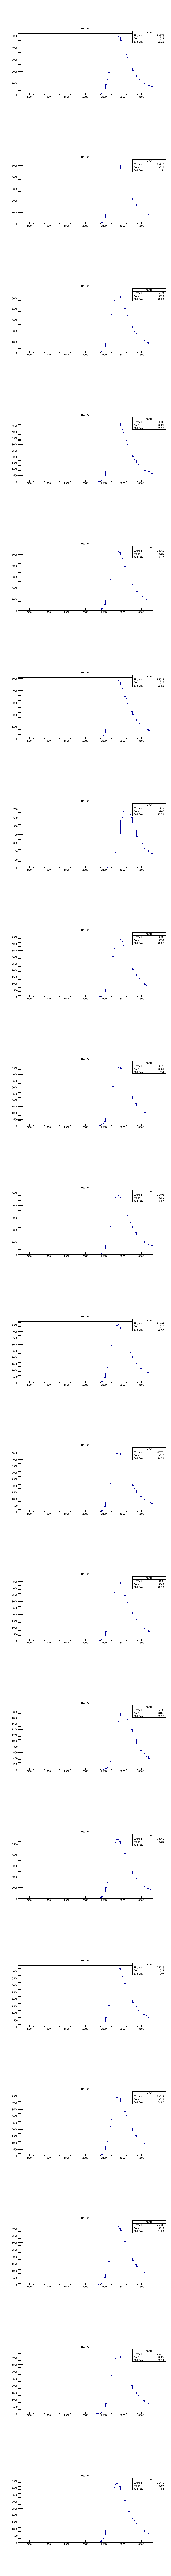

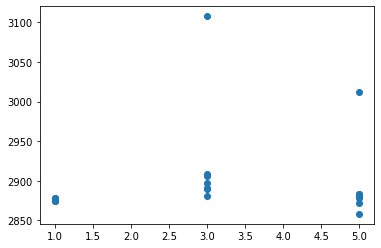

In [4]:
#comparison of 1cm to find constant between voltages for 1cm
#constant for the 1cm: 
runNumbers1cm1580 = ["1572172309", "1572172623", "1572172945", "1572173331",
                     "1572173645", "1572173990", "1572199259", "1572171025",
                     "1572171442", "1572171865", "1572174366", "1572174791",
                     "1572175181", "1571991208", "1572167644", "1572169691",
                     "1572170351", "1572175587", "1572176260", "1572176931"]
GeV1cm1580 = [1]*6 + [3]*7 + [5]*7 #x axis


fittiGraph(runNumbers1cm1580)
#make it an array so that we can slice it easily
means1cm1580 = np.array(fittiGraph(runNumbers1cm1580))
#print(fittiGraph(runNumbers))
print('means')
print('these are the MPVs')
print(means1cm1580[:,0])


scintVal1cm1580 = means1cm1580[:,0] #y axis

print('\n\n' + '~'*30 + '\n')
print('1cm 1580V')
k1cm = np.polyfit(GeV1cm1580,scintVal1cm1580,1)
print(k1cm[0])

plot1cm1580V = plt.scatter(GeV1cm1580,scintVal1cm1580)
print(plot1cm1580V)


c1 = TCanvas('c1', 'c1', 800, 600*len(runNumbers1cm1580))
c1.Divide(1, len(runNumbers1cm1580))
hist = [None] * len(runNumbers1cm1580)
importFile = [None] * len(runNumbers1cm1580)

for idx, run in enumerate(runNumbers1cm1580):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()
#all these graphs look good :)))


8
7
8
1cm 1530V
389.9474818847028
[389.94748188 307.24229038]
0.9077211610948196
 FCN=752.582 FROM MIGRAD    STATUS=CONVERGED     154 CALLS         155 TOTAL
                     EDM=1.50998e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.97612e+04   1.53238e+02   1.33372e+00  -1.18185e-07
   2  MPV          2.24519e+03   8.34635e-01   9.57965e-03  -1.69213e-05
   3  Sigma        1.18684e+02   5.20973e-01   6.36511e-06  -7.45357e-02
 FCN=500.118 FROM MIGRAD    STATUS=CONVERGED     176 CALLS         177 TOTAL
                     EDM=1.11581e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34846e+04   1.05087e+02   7.42845e-01  -5.18500e-08
   2  MPV          2.1588

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


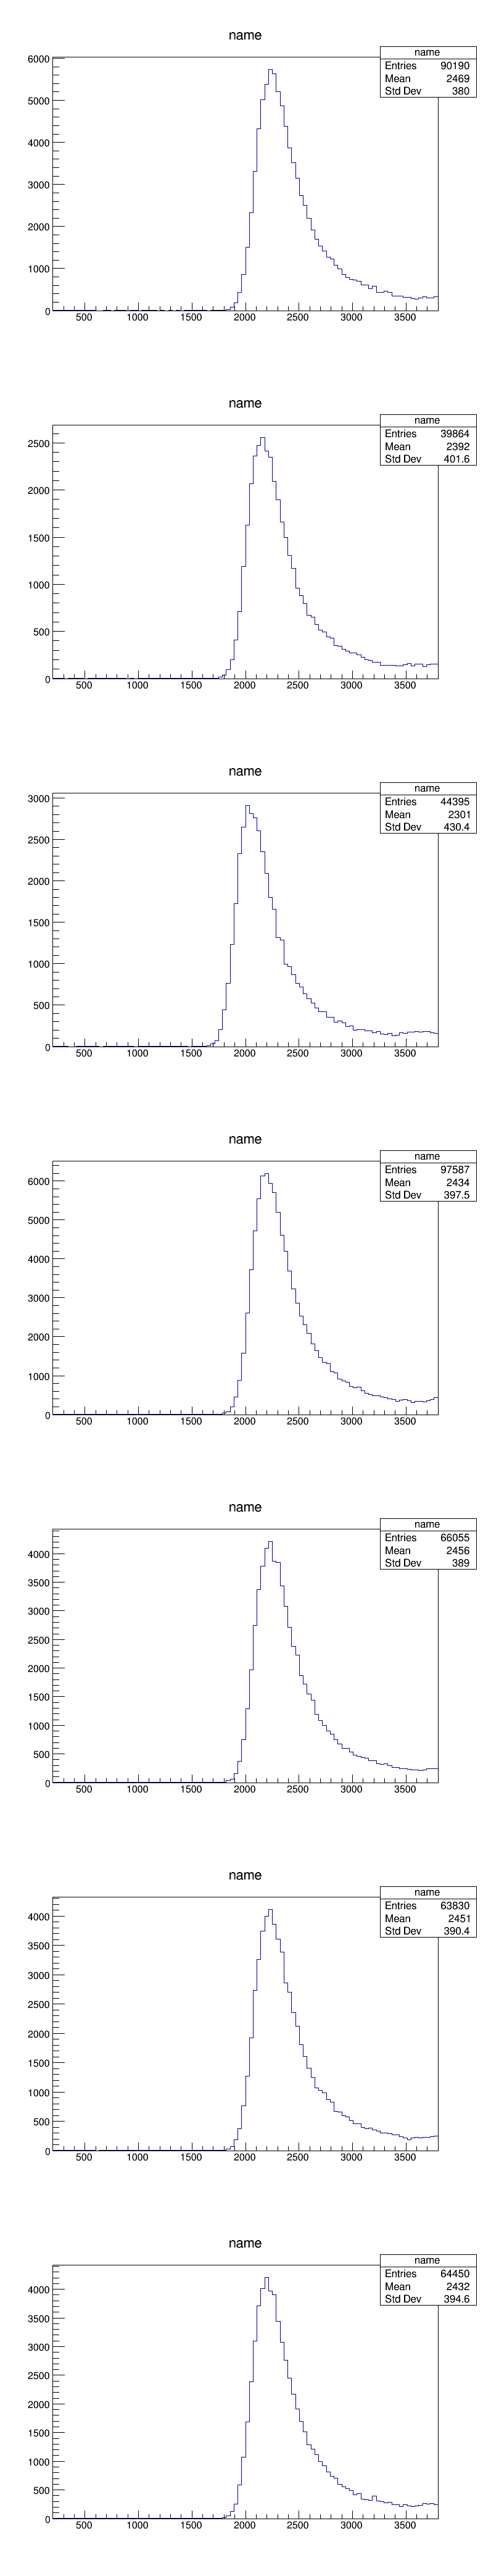

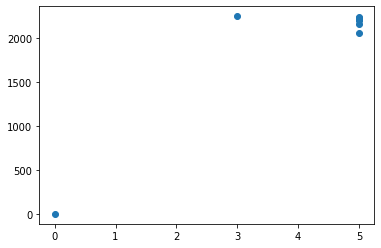

In [23]:
## TRYING TO DRAW ALL HISTOGRAMS
## ONLY DRAWS ONE, WITH WEIRD DIMENSIONS :(

#compare the other 1cm runs, one at 1530V and various GeV
runs1cm1530 = ["1572204380","1571991659","1572169200",
               "1572204862","1572205682","1572206303","1572206843"]
GeV1cm1530 = [0]*1 + [3]*1 + [5]*6

#find the MPV's
fittiGraph(runs1cm1530)
means1cm1530 = np.array(fittiGraph(runs1cm1530))

"""
for i in range(len(means1cm1530)):
    if means1cm1530[i][0] < 0:
        means1cm1530[i][0] *= -1
"""
"""
c1 = TCanvas("ScintHist", "ScintHist", 800, 600)
c1.Divide(1, len(runs1cm1530))

for i, run in enumerate(runs1cm1530):
    runName= f"/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/{run}.root"
    importFile = TFile(runName, "READ")
    scint1530 = importFile.Get("RAWdata")
    scint1530Hist =  TH1D("name", "hist", 100, 200, 3800)
    
    c1.cd(i)
    scint1530.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    scint1530Hist.DrawCopy()

c1.Draw()

"""
#LAM CODE

c1 = TCanvas('c1', 'c1', 800, 600*len(runs1cm1530))
c1.Divide(1, len(runs1cm1530))
hist = [None] * len(runs1cm1530)
importFile = [None] * len(runs1cm1530)

for idx, run in enumerate(runs1cm1530):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()






#make numpy find the slope of the means to get k value

scintVal1cm1530 = np.insert(means1cm1530[:,0], 0, 0)
print('1cm 1530V')
k1cm1530 = np.polyfit(GeV1cm1530,scintVal1cm1530,1)
rval = np.corrcoef(GeV1cm1530,scintVal1cm1530)[0,1] 
print(k1cm1530[0])
print(k1cm1530)
print(rval)

plot1cm1530V = plt.scatter(GeV1cm1530,scintVal1cm1530)
print(plot1cm1530V)

#1572208515,1572208677","1572208366, 1572208189,1572207988, 1572207775 were the bad runs, now cut

0.2cm
2.0945646444857497
 FCN=3593.86 FROM MIGRAD    STATUS=CONVERGED     169 CALLS         170 TOTAL
                     EDM=3.53914e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.25594e+04   1.16715e+02   2.18438e+00   8.10655e-06
   2  MPV          2.02440e+03   1.15322e+00   3.30426e-02   4.88935e-04
   3  Sigma        1.63430e+02   7.45276e-01   1.66513e-05   5.19274e-01
 FCN=3399.89 FROM MIGRAD    STATUS=CONVERGED     158 CALLS         159 TOTAL
                     EDM=4.3101e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.24884e+04   1.15941e+02   2.11730e+00  -3.05001e-06
   2  MPV          2.02613e+03   1.15667e+00   3.21657e-02  -7.74889e-04
   3  Sig

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


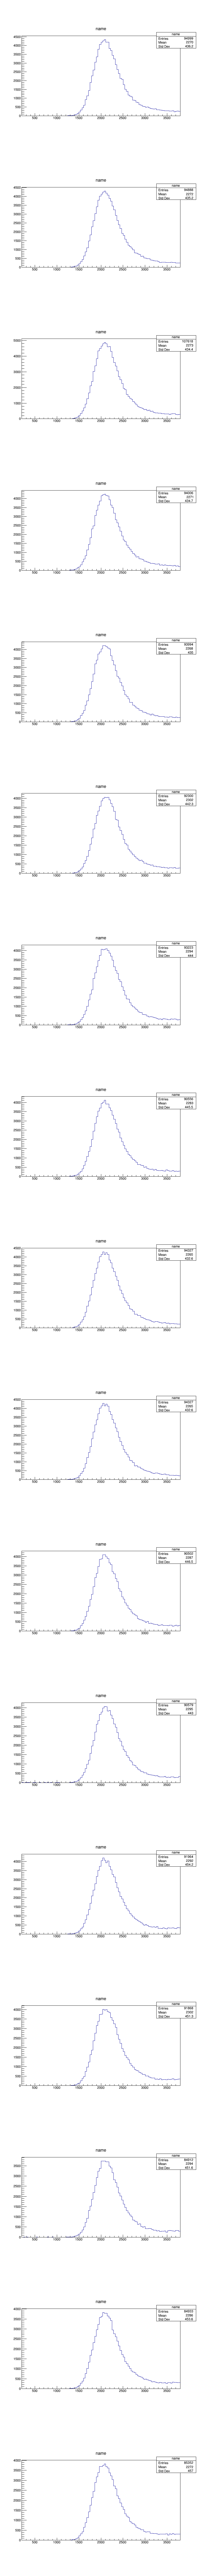

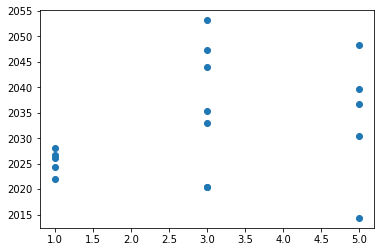

In [14]:
#find slope comparisons for the 0.2cm one at different voltages

#runs comparing the 0.2cm 1800V
runspt2cm1800 = ['1572192245', '1572192584', '1572192942', '1572193352', '1572193711',\
                 '1572190918', '1572191362', '1572191829', '1572194050', '1572194050', '1572194833', '1572195254',\
                 '1572188706', '1572189388', '1572196002', '1572196640', '1572197296']

#find the MPVs
fittiGraph(runspt2cm1800)
meanspt2cm1800 = np.array(fittiGraph(runspt2cm1800)) #[:,0] are the MPVs

#make numpy find the slope
GeV2cm1800 = [1]*5 + [3]*7 + [5]*5
scintValpt2cm1800 = meanspt2cm1800[:,0]

print('0.2cm')
kpt2cm1800 = np.polyfit(GeV2cm1800,scintValpt2cm1800,1)
print(kpt2cm1800[0])

plotpt2cm1800V = plt.scatter(GeV2cm1800,scintValpt2cm1800)
print(plotpt2cm1800V)

c1 = TCanvas('c1', 'c1', 800, 600*len(runspt2cm1800))
c1.Divide(1, len(runspt2cm1800))
hist = [None] * len(runspt2cm1800)
importFile = [None] * len(runspt2cm1800)

for idx, run in enumerate(runspt2cm1800):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()

    
#only one bad run: 1572199006. It has been cut

0.2cm
4.6891965871302705
 FCN=656.846 FROM MIGRAD    STATUS=CONVERGED     163 CALLS         164 TOTAL
                     EDM=9.85083e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.25631e+04   1.61262e+02  -4.16343e-01  -4.18228e-06
   2  MPV          2.21229e+03   7.85415e-01  -3.40102e-03  -5.62025e-04
   3  Sigma        1.15690e+02   4.83556e-01   1.07130e-05  -3.33370e-01
 FCN=759.084 FROM MIGRAD    STATUS=CONVERGED     184 CALLS         185 TOTAL
                     EDM=9.46153e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.23455e+04   1.62544e+02   1.41269e+00   1.10646e-06
   2  MPV          2.21653e+03   7.85799e-01   9.17831e-03  -2.41738

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


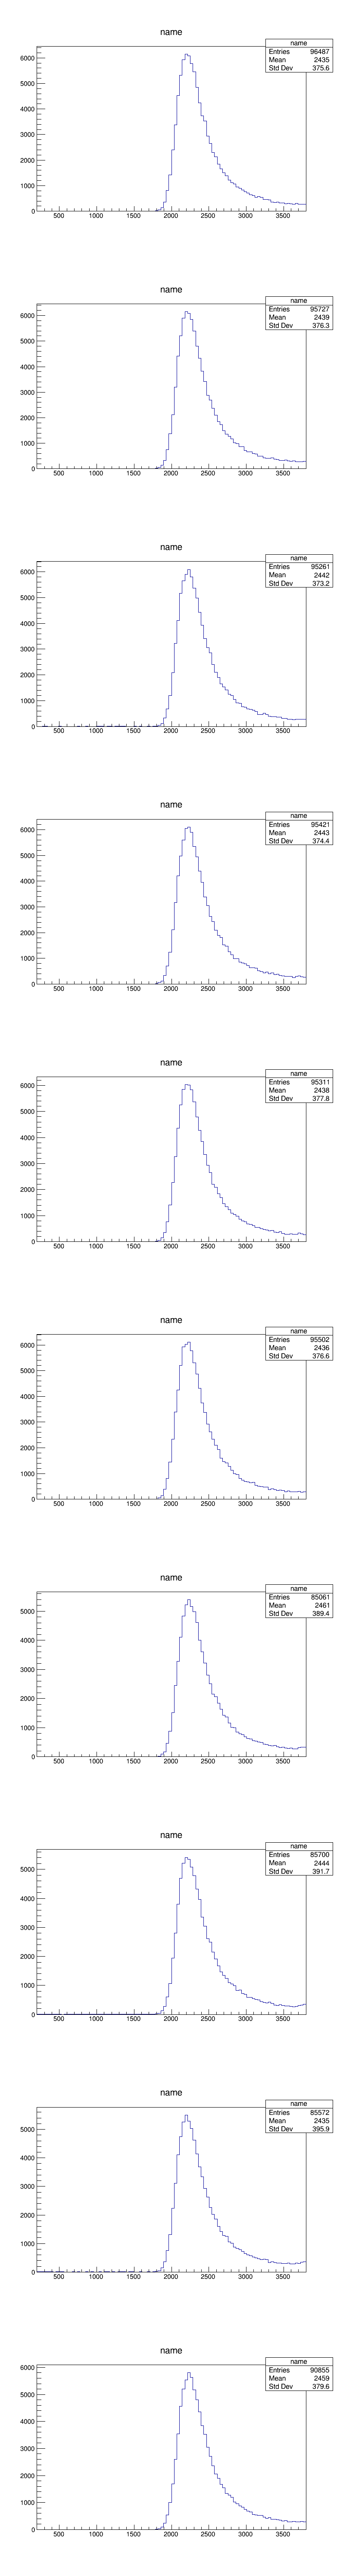

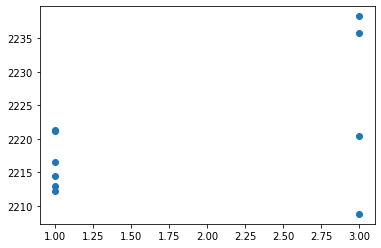

In [8]:
#runs for the 0.2 cm 1530V
#runs comparing the 0.2cm 1530V
runspt2cm1530 = ['1572201397', '1572201758', '1572202090', '1572202506', '1572202839', '1572203198',\
                 '1572199396', '1572200064', '1572200730', '1572203962']

#find the MPVs
fittiGraph(runspt2cm1530)
meanspt2cm1530 = np.array(fittiGraph(runspt2cm1530)) #[:,0] are the MPVs

#make numpy find the slope
GeVpt2cm1530 = [1]*6 + [3]*4
scintValpt2cm1530 = meanspt2cm1530[:,0]

print('0.2cm')
kpt2cm1530 = np.polyfit(GeVpt2cm1530,scintValpt2cm1530,1)
print(kpt2cm1530[0])

plotpt2cm1530V = plt.scatter(GeVpt2cm1530,scintValpt2cm1530)
print(plotpt2cm1530V)

c1 = TCanvas('c1', 'c1', 800, 600*len(runspt2cm1530))
c1.Divide(1, len(runspt2cm1530))
hist = [None] * len(runspt2cm1530)
importFile = [None] * len(runspt2cm1530)

for idx, run in enumerate(runspt2cm1530):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()
    
#all these runs are good

2cm
6.407665156833858
 FCN=705.632 FROM MIGRAD    STATUS=CONVERGED     172 CALLS         173 TOTAL
                     EDM=4.59407e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.77102e+04   1.45371e+02   1.25902e+00   6.84321e-08
   2  MPV          2.56824e+03   9.03574e-01   9.17898e-03  -4.19520e-05
   3  Sigma        1.19565e+02   5.45956e-01   6.51669e-06   3.42600e-02
 FCN=301.708 FROM MIGRAD    STATUS=CONVERGED     203 CALLS         204 TOTAL
                     EDM=4.08033e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.19448e+04   1.55377e+02   8.84860e-01   8.41492e-06
   2  MPV          2.57174e+03   8.36943e-01   5.66730e-03  -6.84856e-05
   3  Sigma

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


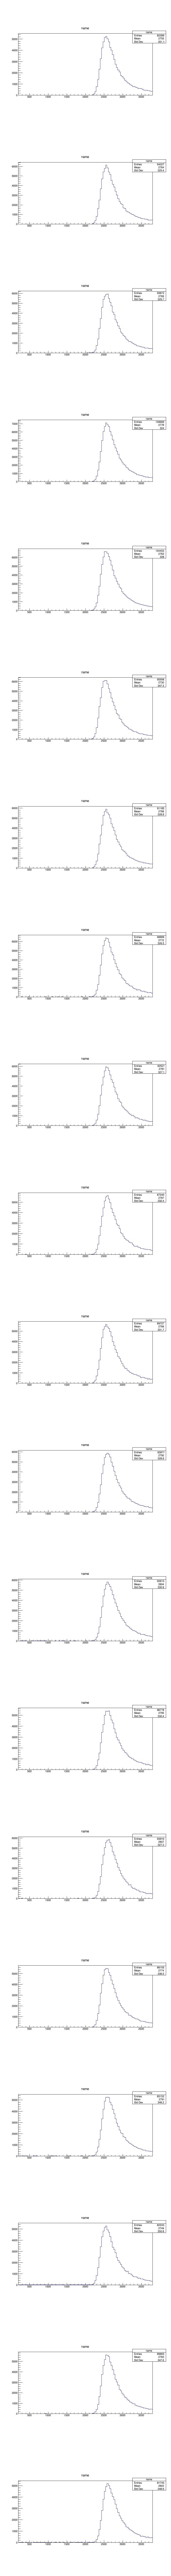

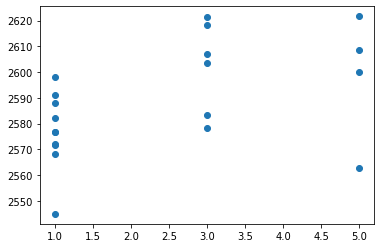

In [9]:
#2cm scint at 1450V
runs2cm1450 = ['1572097787', '1572101587', '1572102133', '1572102470',\
               '1572102973', '1572103468', '1572104299', '1572104678',\
               '1572105037', '1572105397', '1572100097', '1572100629',\
               '1572101077', '1572105827', '1572106243', '1572106685',\
               '1572099283', '1572107138', '1572107806', '1572108522']

#find the MPVs
fittiGraph(runs2cm1450)
means2cm1450 = np.array(fittiGraph(runs2cm1450)) #[:,0] are the MPVs

#make numpy find the slope
GeV2cm1450 = [1]*10 + [3]*6 + [5]*4
scintVal2cm1450 = means2cm1450[:,0]


print('2cm')
k2cm1450 = np.polyfit(GeV2cm1450,scintVal2cm1450,1)
print(k2cm1450[0])

plot2cm1450V = plt.scatter(GeV2cm1450,scintVal2cm1450)
print(plot2cm1450V)


c1 = TCanvas('c1', 'c1', 800, 600*len(runs2cm1450))
c1.Divide(1, len(runs2cm1450))
hist = [None] * len(runs2cm1450)
importFile = [None] * len(runs2cm1450)

for idx, run in enumerate(runs2cm1450):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()

#no weird runs

0.5cm
2.7975514800695227
 FCN=2355.63 FROM MIGRAD    STATUS=CONVERGED     214 CALLS         215 TOTAL
                     EDM=1.80976e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.34621e+04   1.97956e+02   2.95039e+00   1.11699e-06
   2  MPV          1.66982e+03   6.42512e-01   1.43390e-02   3.64739e-04
   3  Sigma        1.07022e+02   4.05568e-01   8.70436e-06  -7.49271e-01
 FCN=2133.63 FROM MIGRAD    STATUS=CONVERGED     181 CALLS         182 TOTAL
                     EDM=3.33632e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.80431e+04   1.85101e+02   1.77743e-01  -1.04452e-08
   2  MPV          1.66573e+03   6.91138e-01   4.36303e-06  -5.17478

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


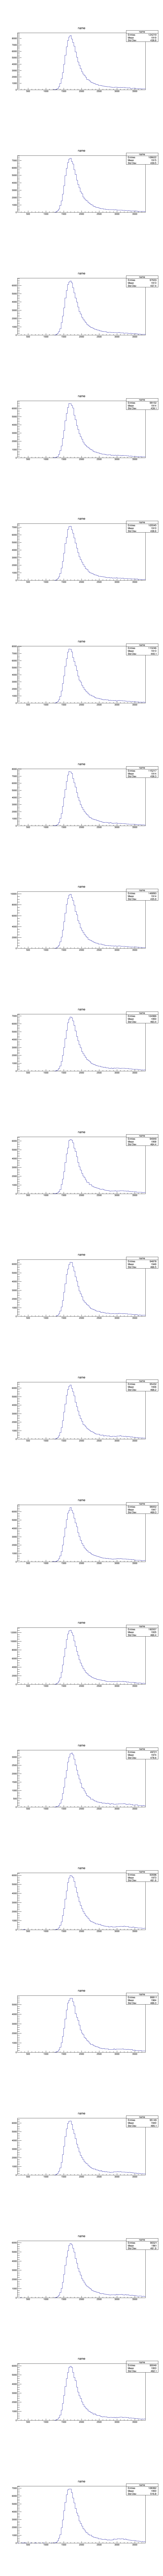

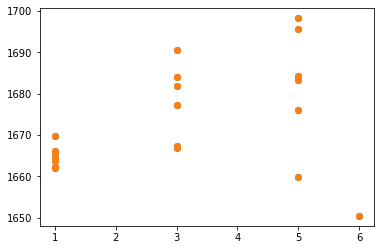

In [10]:
#0.5 cm at 1630V
runspt5cm1630 = ['1572006472', '1572006850', '1572007197', '1572007510',\
                 '1572012186', '1572012538', '1572012923', '1572013337',\
                 '1572004934', '1572005884', '1572010530', '1572007834',\
                 '1572010964', '1572011373', '1572002093', '1572003556',\
                 '1572004238', '1572008331', '1572008983', '1572009598',\
                 '1572013869']
#find the MPVs
fittiGraph(runspt5cm1630)
meanspt5cm1630 = np.array(fittiGraph(runspt5cm1630)) #[:,0] are the MPVs

#make numpy find the slope
GeVpt5cm1630 = [1]*8 + [3]*6 + [5]*6 + [6]*1
scintValpt5cm1630 = meanspt5cm1630[:,0]


print('0.5cm')
kpt5cm1630 = np.polyfit(GeVpt5cm1630,scintValpt5cm1630,1)
print(kpt5cm1630[0])


plotpt5cm1630V = plt.scatter(GeVpt5cm1630,scintValpt5cm1630)
print(plotpt5cm1630V)


plotpt5cm1630V = plt.scatter(GeVpt5cm1630,scintValpt5cm1630)
print(plotpt5cm1630V)


c1 = TCanvas('c1', 'c1', 800, 600*len(runspt5cm1630))
c1.Divide(1, len(runspt5cm1630))
hist = [None] * len(runspt5cm1630)
importFile = [None] * len(runspt5cm1630)

for idx, run in enumerate(runspt5cm1630):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c1.Draw()

#all these are good runs

crystal
83.73620099139626
 FCN=2412.91 FROM MIGRAD    STATUS=CONVERGED     108 CALLS         109 TOTAL
                     EDM=2.13459e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00378e+04   4.36512e+01  -3.17088e-02   2.70951e-08
   2  MPV          1.35285e+03   3.58888e+00   8.92886e-03   1.33467e-04
   3  Sigma        4.29615e+02   1.78925e+00   1.95173e-06  -3.32878e-01
 FCN=4014.22 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=2.13018e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34205e+04   5.97542e+01  -1.45917e-02   2.84261e-07
   2  MPV          1.05989e+03   2.34724e+00  -1.43576

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


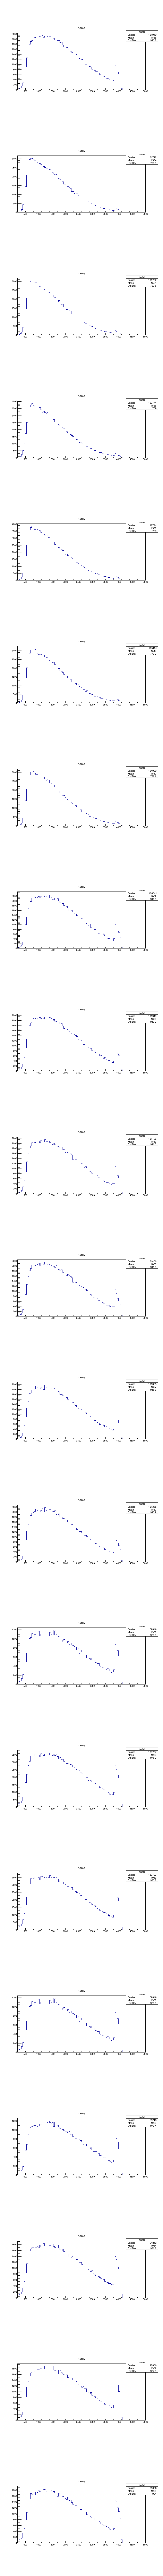

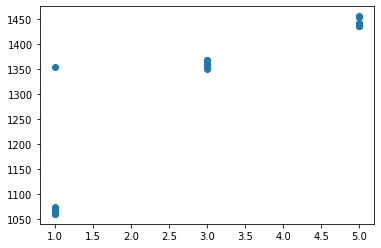

In [13]:
#crystal 1800V
runscrystal1800 = ['1572183037', '1572183476', '1572183476', '1572183834',\
                   '1572183834', '1572184203', '1572184622', '1572182574',\
                   '1572183037', '1572184952', '1572184952', '1572185366',\
                   '1572185366', '1572180849', '1572179299', '1572179299',\
                   '1572180849', '1572181315', '1572181745', '1572185799',\
                   '1572186485']
#find the MPVs
fittiGraph(runscrystal1800)
meanscrystal1800 = np.array(fittiGraph(runscrystal1800)) #[:,0] are the MPVs

#make numpy find the slope
GeVcrystal1800 = [1]*7 + [3]*6 + [5]*8 
scintValcrystal1800 = meanscrystal1800[:,0]


print('crystal')
kcrystal1800 = np.polyfit(GeVcrystal1800,scintValcrystal1800,1)
print(kcrystal1800[0])

plotcrystal1800V = plt.scatter(GeVcrystal1800,scintValcrystal1800)
print(plotcrystal1800V)

c1 = TCanvas('c1', 'c1', 800, 600*len(runscrystal1800))
c1.Divide(1, len(runscrystal1800))
hist = [None] * len(runscrystal1800)
importFile = [None] * len(runscrystal1800)

for idx, run in enumerate(runscrystal1800):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c1.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 5000)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<5000 && QDC0_ch0>200")
    c1.Draw()
    
#are they good?

In [11]:
#let's verify: 1cm scint from 1 GeV w K to the 5GeV. 
#5 GeV run
control = ["1572176260"]
#the 1GeV run
test = ["1572172309"]

fittiGraph(test)
means1GeVProj = np.array(fittiGraph(test))
#forecasted value
means1GeVProj += [k1cm[0]*means1GeVTest[0]]
means5GeVActual = np.array(fittiGraph(control))

print("Actual mean")
print(means5GeVActual)
print("Projected mean")
print(means1GeVProj)



NameError: name 'means1GeVTest' is not defined

 FCN=811.05 FROM MIGRAD    STATUS=CONVERGED     106 CALLS         107 TOTAL
                     EDM=3.08828e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.61798e+04   1.31143e+02  -2.15287e-01   1.32900e-07
   2  MPV          2.87790e+03   1.08019e+00   2.61562e-04   2.09391e-05
   3  Sigma        1.48616e+02   7.26718e-01   1.50244e-06  -2.26475e-02
 FCN=811.05 FROM MIGRAD    STATUS=CONVERGED     106 CALLS         107 TOTAL
                     EDM=3.08828e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.61798e+04   1.31143e+02  -2.15287e-01   1.32900e-07
   2  MPV          2.87790e+03   1.08019e+00   2.61562e-04   2.09391e-05
   3  Sig